# **Welcome to Assignment 1 of Deep Learning/Deep Learning for Vision.**
In this assignment you will get a chance to implement basic Image processing tasks mentioned below:


1. Correlation (with Standardization)

2. Same Convolution (without Standardization)

3. Canny Edge Detection Steps
    * Noise Reduction/Smoothing
    * Finding Gradient Magnitude and Direction
    * Non-Max Suppresion
4. Image Sharpening (with Laplacian)


### **Instructions**
1. Use Python 3.x to run this notebook
3. Write your code only in between the lines 'YOUR CODE STARTS HERE' and 'YOUR CODE ENDS HERE'.
you sould not change anything else code cells, if you do, the answers you are supposed to get at the end of this assignment might vary a lot. Most importantly, do not work with any other input images other than what are being used in the code. 
4. Read documentation of each function carefully.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# %matplotlib inline uncomment this line if you're running this notebook on your local PC

In [2]:
# DO NOT CHANGE THIS CODE
np.random.seed(0)

## 1. Correlation (with Standardization)

Correlation is a measure of similarity between two signals. In this module, you are expected to complete the `correlation` function and test your implementation on the below two image signals.

<!-- ![alt text](images/correlation_task.png "Correlation Task") -->
<!-- ![alt text](https://drive.google.com/uc?id=1QloBCfvnThKqygTVg44pu4OD_rq3TFQC) -->

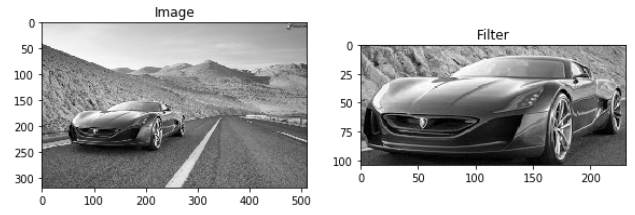

_Note: Make sure to standardize the image subsets before applying the filter (refer lecture videos for clarity)._ 

In [3]:
def standardize(image):
    # Some areas in the image may have all 255 so variance will be 0, to avoid division by zero, we introduce eps
    eps = 1e-5  
    return (image - np.mean(image))/(np.std(image)+eps)

In [4]:
# Implement Linear Filtering technique on an image using a linear filter
def correlation(image, filter_): # 'filter' is a keyword in python, so is the underscore at the end.
    """
    Performs linear filtering on an image. Standardizes image before applying the filter.
    Assume image size is W1xW2, filter size is F1xF2.
    
    Arguments:
    image -- input image as a numpy array
    filter_ -- linear filter to apply on image as a numpy array.
    
    Returns:
    result -- filtered image. 
    """
    # DO NOT CHANGE THE CODE BETWEEN THESE LINES
    ############################################
    image_height, image_width = image.shape
    filter_height, filter_width = filter_.shape
    
    # result shape will be of size --> (((W1−F1+2P) / S) + 1) x (((W2−F2+2P) / S) + 1), where 'P' is padding length
    # S is stride length, if you don't know about them, don't worry, you will learn in upcoming lectures. For now
    # we will use simplest setting P=0,S=1. See the next line.
    result_height, result_width = (image_height - filter_height) + 1, (image_width - filter_width) + 1
    result = np.zeros((result_height, result_width))
    #############################################
    
    # YOUR CODE STARTS HERE
    
    filter_ = standardize(filter_)
    
    for i in range(result_height):
        for j in range(result_width):
            std_image = standardize(image[i: i+filter_height, j: j+filter_width])
            result[i][j]=(filter_ * std_image).sum()
    
    # YOUR CODE ENDS HERE
    return result
    

In [5]:
# To test your implementation, run the below code.
image = Image.open('./images/car_road.jpg')
filter_ = Image.open('./images/car.jpg')

# Converts image to gray scale, so that it is easy to apply a filter
image = np.array(image.convert('L'))
filter_ = np.array(filter_.convert('L'))

result = correlation(image, filter_)

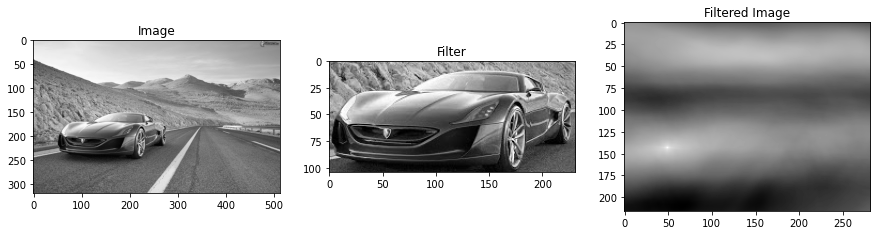

In [6]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax1.title.set_text('Image')
plt.imshow(image, cmap='gray')
ax2 = fig.add_subplot(132)
ax2.title.set_text('Filter')
plt.imshow(filter_, cmap='gray')
ax3 = fig.add_subplot(133)
ax3.title.set_text('Filtered Image')
plt.imshow(result, cmap='gray')
plt.show()

### Question 1

Where do you find the bright spot in the image displayed above?

In [7]:
# Print answer to Question 1 here

result_coord = np.where(result == np.amax(result))
pixelCoord = list(zip(result_coord[0], result_coord[1]))
for i in pixelCoord:
    print(i)

(143, 49)


## 2. Same Convolution (without Standardization)

Here, you are expected to implement convolution as a simple linear filtering operation rather than what is commonly accepted in DSP literature which is "correlation with flipped kernel". We are going to do linear filtering just like in the case of correlation but without standardization.

In "same convolution", we want the output image to have the same dimension as the input image. In order to do so we need to pad the image. Here we will use zero padding, we will talk about other types of padding later in the tutorial. Now for “same convolution” we need to calculate the size of the padding using the following formula, where k is the size of the kernel.


$(k-1)/2$

This is already provided in the started code. 

_Note: For this, you MUST not standardize the image subset before performing the convolution operation._

In [8]:
# Implement Linear Filtering technique on an image using a linear filter
def same_convolution2D(image, filter_): # 'filter' is a keyword in python, so is the underscore at the end.
    """
    Performs linear filtering on an image.
    Assume image size is W1xW2, filter size is F1xF2.
    
    Arguments:
    image -- input image (grayscale) as a numpy array
    filter_ -- linear filter to apply on image as a numpy array.
    standardize_flag -- a flag to standardize the image portion or not
    
    Returns:
    result -- filtered image. 
    """
    # DO NOT CHANGE THE CODE BETWEEN THESE LINES
    ############################################
    image_height, image_width = image.shape
    filter_height, filter_width = filter_.shape
    
    result = np.zeros(image.shape)
    
    pad_height = int((filter_height - 1) / 2)
    pad_width = int((filter_width - 1) / 2)
    
    # We are basically creating an empty numpy 2D array and then copying the image to the proper location 
    # so that we can have the padding applied in the final output.
    padded_image = np.zeros((image_height + (2 * pad_height), image_width + (2 * pad_width)))
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image
    #############################################
    
    # YOUR CODE STARTS HERE (YOU CAN USE THE SAME CODE FROM correlation, FOR THE MOST PART)
    
    for i in range(image_height):
        for j in range(image_width):
            std_pad_image = padded_image[i: i+filter_height, j: j+filter_width]
            result[i, j]=(filter_ * std_pad_image).sum()
            
    # YOUR CODE ENDS HERE
    return result
    

In [9]:
# To test your implementation, run the below code.
image = Image.open('./images/clown.png')
filter_ = np.array([[1, 2, 3],
                    [4, 5, 6],
                    [7, 8, 9]])
# Converts image to gray scale, so that it is easy to apply a filter
image = np.array(image.convert('L'))
result = same_convolution2D(image, filter_)

print("Image Shape: {}".format(image.shape))
print("Filter Shape: {}".format(filter_.shape))
print("Result Shape: {}".format(result.shape))

Image Shape: (256, 256)
Filter Shape: (3, 3)
Result Shape: (256, 256)


### (Ungraded) Mean Squared Error

For the rest of the assignment, we will be using Mean Square Error (MSE) to compare and evaluate input image with output responses. MSE between the two images is the sum of the squared difference between the two images. Implement MSE in the following cell.

In [10]:
def mse(image1, image2):    
    # YOUR CODE STARTS HERE
    err = (np.square(image1 - image2)).mean(axis=None)
    # YOUR CODE STARTS HERE
    return err

In [11]:
# To test the implementation, run the following code and it must return `True True` 
print(mse(image, image) == 0, round(mse(image, image.T)) == 103)

True True


## 3. Canny Edge Detector Steps

### Noise Reduction/Smoothing

We first smooth the image to reduce the amount of edges that detected from the noise. Smoothing is typically done by applying a low-pass filter to the image (as the noise is often high frequency term in the image). In this assignment, you will use a Gaussian filter (MUST use the exact same one in the lecture slides).

In [12]:
import numpy as np
from PIL import Image

###YOUR CODE STARTS HERE

# Define 3*3 Gaussian Blur filter (Hint: refer lecture slides)
gaussian_filter = np.array([[1/16, 2/16, 1/16], [2/16, 4/16, 2/16], [1/16, 2/16, 1/16]])


# Compute response using same_convolution2D function (use image)
response_smooth = same_convolution2D(image, gaussian_filter)

###YOUR CODE ENDS HERE

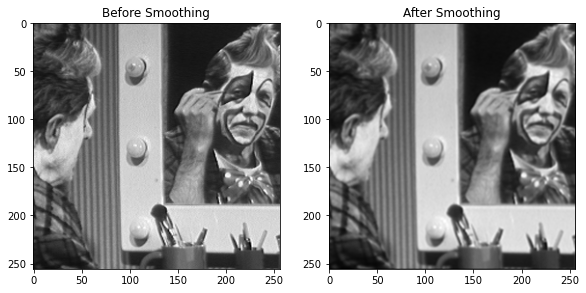

In [13]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax1.title.set_text('Before Smoothing')
plt.imshow(image, cmap='gray')
ax2 = fig.add_subplot(132)
ax2.title.set_text('After Smoothing')
plt.imshow(response_smooth, cmap='gray')
plt.show()

### Question 2

What is the MSE between `image` and `response_smooth` to the nearest integer, assuming you have used `gaussian_filter` from the lecture slides?

In [14]:
# Print answer to Question 2 here
print(round(mse(image, response_smooth)))

48


### Finding Gradient Magnitude and Direction

In [15]:
import numpy as np
from PIL import Image

###YOUR CODE STARTS HERE

# Define 3*3 Vertical sobel filter (Hint: refer lecture slides)
sobel_x = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])

#Define 3*3 Horizontal sobel filter (Hint: refer lecture slides)
sobel_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])


# Compute vertical response (use response_smooth, not image)
grad_x = same_convolution2D(response_smooth, sobel_x)

# Compute horizontal response (use response_smooth, not image)
grad_y = same_convolution2D(response_smooth, sobel_y)

# Compute gradient magnitude and direction (Hint: refer lecture slides)
magnitudes = np.sqrt(np.square(grad_x) + np.square(grad_y))

directions = np.arctan2(grad_y, grad_x)

# Convert radians to degrees
angles = np.degrees(directions)
angles[angles < 0] += 180

###YOUR CODE ENDS HERE

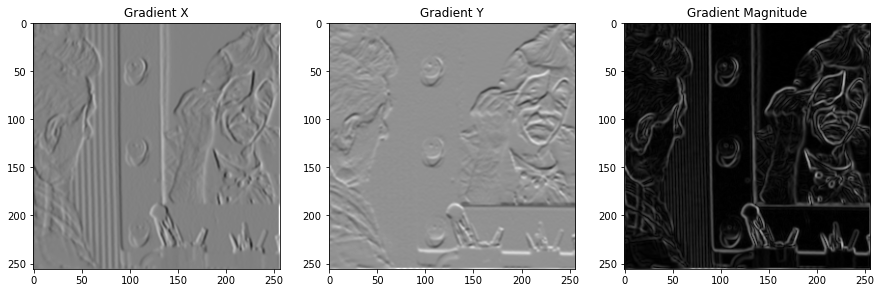

In [16]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax1.title.set_text('Gradient X')
plt.imshow(grad_x, cmap='gray')
ax2 = fig.add_subplot(132)
ax2.title.set_text('Gradient Y')
plt.imshow(grad_y, cmap='gray')
ax3 = fig.add_subplot(133)
ax3.title.set_text('Gradient Magnitude')
plt.imshow(magnitudes, cmap='gray')
plt.show()

### (Ungraded, only for illustration) Plotting Gradient Direction

Note: `plt.quiver` calculates the gradient direction internally from `grad_x` and `grad_y`.

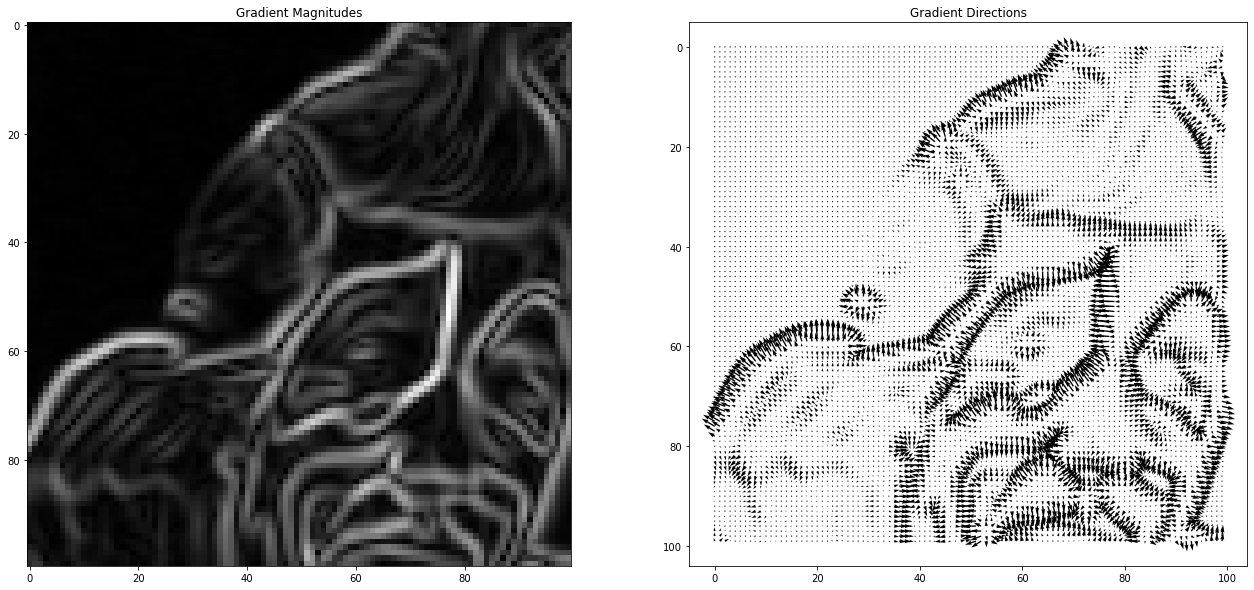

In [17]:
fig = plt.figure(figsize=(22,10))
ax1 = fig.add_subplot(121)
ax1.title.set_text('Gradient Magnitudes')
plt.imshow(magnitudes[10:110, 150:250], cmap='gray')
ax3 = fig.add_subplot(122)
ax3.title.set_text('Gradient Directions')
plt.quiver(grad_x[10:110, 150:250], grad_y[10:110, 150:250], angles='xy')
ax3.invert_yaxis()
plt.show()

### Question 3

Which pixels in the image have minimum and maximum gradient magnitudes? 

In [18]:
# Print answer to Question 3 here
result_coord = np.where(magnitudes == np.amin(magnitudes))
print('Pixel coordinates of minimum value in gradient Magnitudes: ')
min_Pixel_Coord = list(zip(result_coord[0], result_coord[1]))
for i in min_Pixel_Coord:
    print(i)
    
print()

result_coord = np.where(magnitudes == np.amax(magnitudes))
print('Pixel coordinates of maximum value in gradient Magnitudes: ')
max_Pixel_Coord = list(zip(result_coord[0], result_coord[1]))
for i in max_Pixel_Coord:
    print(i)



Pixel coordinates of minimum value in gradient Magnitudes: 
(186, 157)

Pixel coordinates of maximum value in gradient Magnitudes: 
(141, 0)


### Question 4

How many pixels have gradient angles more than or equal to 135 degrees?


In [19]:
# Print answer to Question 4 here
count = 0

for x,y in np.ndindex(angles.shape):
    if angles[x,y] >= 135:
        count = count + 1
    
print(count)

20647


### Non-Maximum Suppresion

After getting gradient `magnitudes` and `angles`, a full scan of image is done to remove any unwanted pixels which may not constitute the edge. There are many ways to perform NMS but for this task we do the following. With the help of the `angles`, we can now trace each edge in the image. You are expected to look in four directions to check the surrounding pixels in a reverse trigonometric direction and keep only the max pixel magnitude value (local maxima) in its place. 

So if the direction/angle is:
* 0 degrees, you scan horizontally for the local maxima
* 45 degrees, you scan in positive diagonal direction for the local maxima
* 90 degrees, you scan in vertically for the local maxima
* 135 degrees, you scan in negative diagonal direction for the local maxima

But angles will obviously not always be exactly 0 or 45 or 90 or 135 degrees exactly. One way to do this is to split them into chunks and you are encouraged to do the following. Assume the angle to be:
* 0 if angle is between 0 and 22.5 degrees (red)
* 45 if angle is between 22.5 and 67.5 degrees (blue)
* 90 if angle is between 67.5 and 112.5 degrees (green)
* 135 if angle is between 112.5 and 157.5 degrees (yellow)
* 0 if angle is between 157.5 and 180 degrees (red)



<!-- ![alt_text](images/nms.png "Non-Maximum Supression") -->

<!-- ![alt text](https://drive.google.com/uc?id=1CE2pV43-7WnPmPbj0yJVcyNkQiU1SsIi) -->

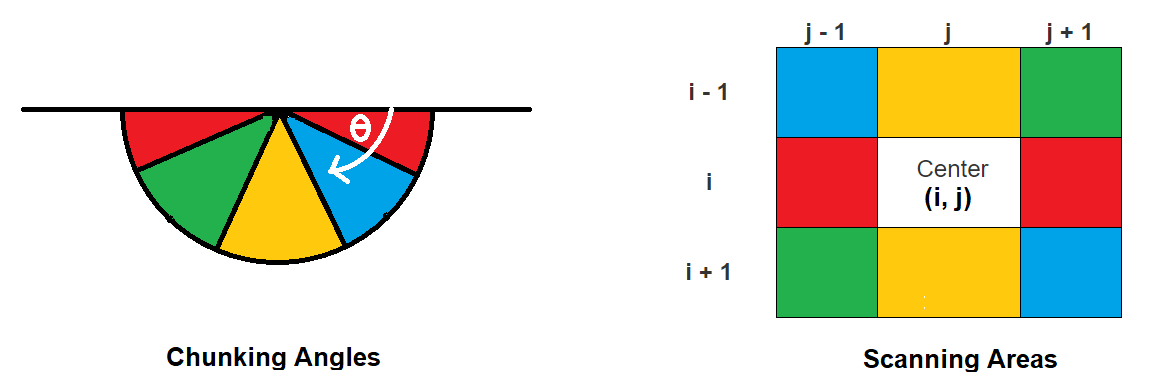

In [20]:
def non_maximum_suppression(magnitudes, angles):
    """
    Performs Non-maximum supression with the help of magnitude and directions.
    
    Arguments:
    magnitudes -- gradient magnitudes as a numpy array
    angles -- gradient angles in degrees as a numpy array.
    
    Returns:
    suppressed -- numpy array with only local maxima    
    """
    image_height, image_width = magnitudes.shape
    suppressed = np.zeros(image.shape)
    for i in range(1, image_height - 1):
        for j in range(1, image_width - 1):
            # YOUR CODE BEGINS HERE
            if (angles[i][j] >= 0) and (angles[i][j] < 22.5):
                val1 = magnitudes[i][j-1]
                val2 = magnitudes[i][j+1]
                
            elif (angles[i][j] >= 22.5) and (angles[i][j] < 67.5):
                val1 = magnitudes[i-1][j-1]
                val2 = magnitudes[i+1][j+1]
                
            elif (angles[i][j] >= 67.5) and (angles[i][j] < 112.5):
                val1 = magnitudes[i-1][j]
                val2 = magnitudes[i+1][j]
                
            elif (angles[i][j] >= 112.5) and (angles[i][j] < 157.5):
                val1 = magnitudes[i-1][j+1]
                val2 = magnitudes[i+1][j-1]
                
            else:
                val1 = magnitudes[i][j-1]
                val2 = magnitudes[i][j+1]
                
            
            if (magnitudes[i][j] >= val1) and (magnitudes[i][j] >= val2):
                suppressed[i][j] = magnitudes[i][j]
            else:
                suppressed[i][j] = 0
            # YOUR CODE ENDS HERE            
    # Scaling pixel values back to 0-255 range (do not remove the next line as Question 5 depends on it)
    suppressed = np.multiply(suppressed, 255.0 / suppressed.max())
    return suppressed

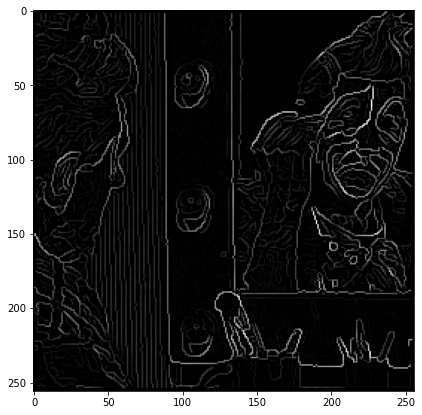

In [21]:
# To test the implementation, run the following code
suppressed = non_maximum_suppression(magnitudes, angles)

plt.figure(figsize=(7,7))
plt.imshow(suppressed, cmap='gray')
plt.show()

### Question 5

How many pixels have values more than or equal to 100 post non-maximum suppression? 


In [22]:
# Print answer to Question 5 here
count = 0

for x,y in np.ndindex(suppressed.shape):
    if suppressed[x,y] >= 100:
        count = count + 1
    
print(count)

1891


## 4. Image Sharpening (with Laplacian)

In this module, you are expected to simply use the Laplace filter to sharpen the smoothed image. 

In [23]:
import numpy as np
from PIL import Image

###YOUR CODE STARTS HERE

# Define 3*3 Laplace filter (Hint: refer lecture slides)
laplacian_filter = np.array([[0, 1, 0],[1, -4, 1], [0, 1, 0]])

# Compute response (use response_smooth, not image)
response_L = same_convolution2D(response_smooth, laplacian_filter)
response_L = standardize(response_L)

# Use response_L to sharpen response_smooth
sharpened = response_smooth - response_L

###YOUR CODE ENDS HERE

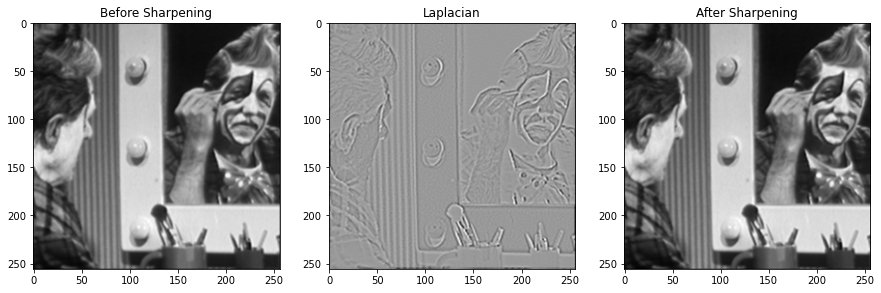

In [24]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax1.title.set_text('Before Sharpening')
plt.imshow(response_smooth, cmap='gray')
ax2 = fig.add_subplot(132)
ax2.title.set_text('Laplacian')
plt.imshow(response_L, cmap='gray')
ax3 = fig.add_subplot(133)
ax3.title.set_text('After Sharpening')
plt.imshow(sharpened, cmap='gray')
plt.show()

### Question 6

One way to check if sharpening worked is to calculate MSE between image against smoothed and sharpened images. Ideally, MSE between the image and smoothed image should be higher.

Did sharpening work? If yes, the following cell must return `True`.

In [25]:
# To test the implementation, run the following code
# Ideally, the output should be True
print(round(mse(image, response_smooth)) > round(mse(image, sharpened)))

True
